In [23]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [3]:
data = pd.read_csv('/content/wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
# Check for missing values
print(data.isnull().sum())  # No Null Values

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


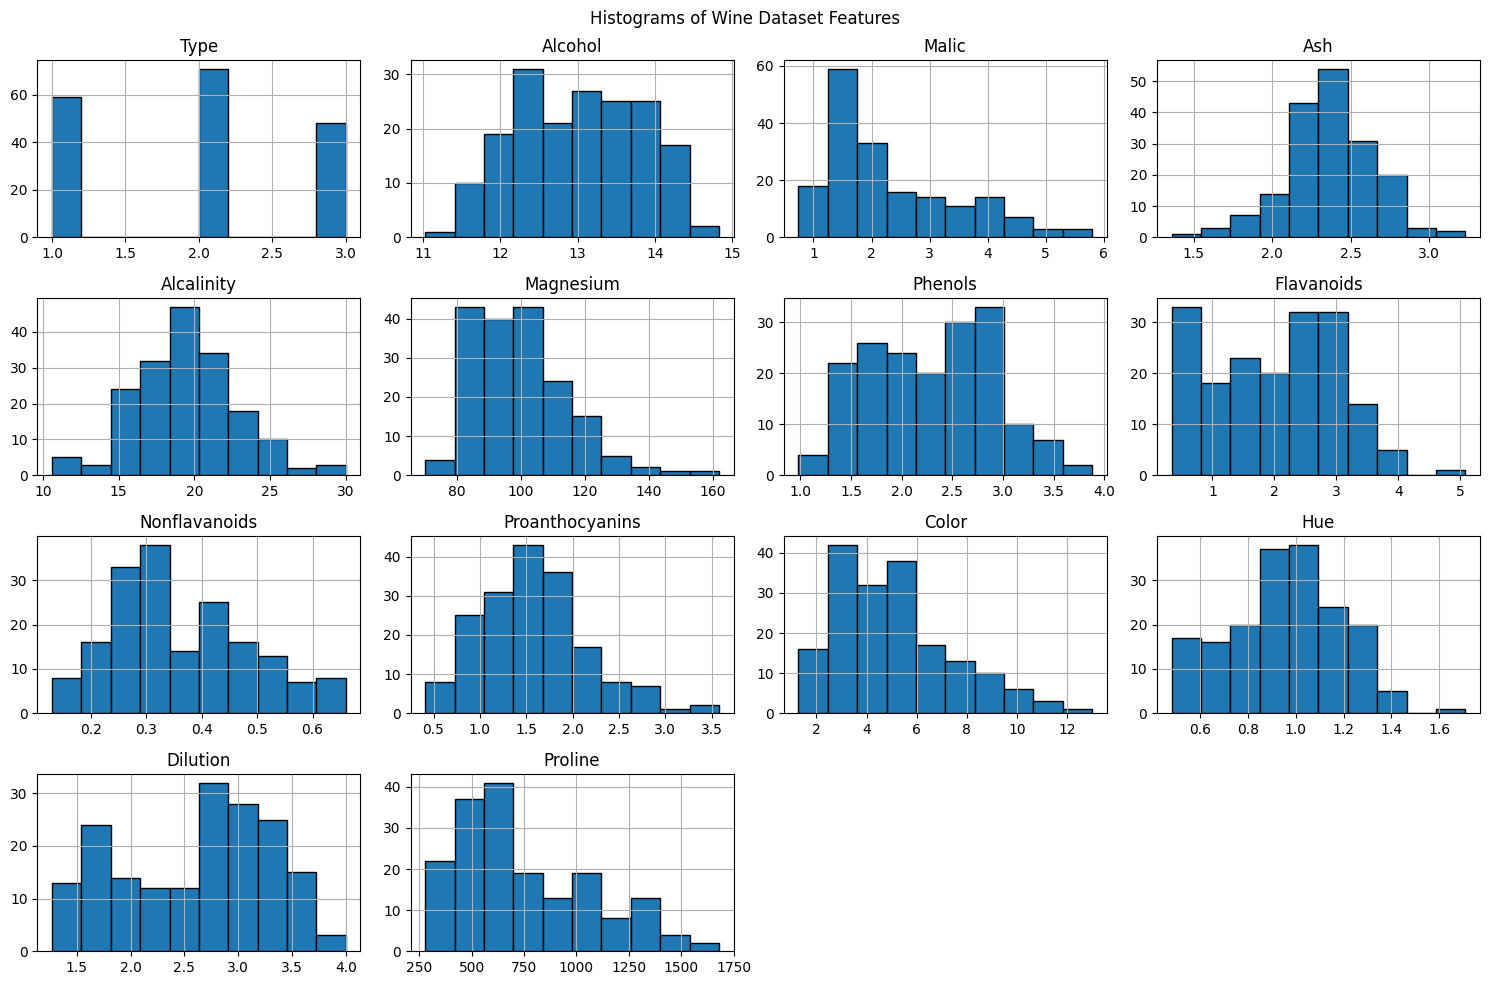

In [8]:
# Histograms
data.hist(figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Wine Dataset Features")
plt.tight_layout()
plt.show()

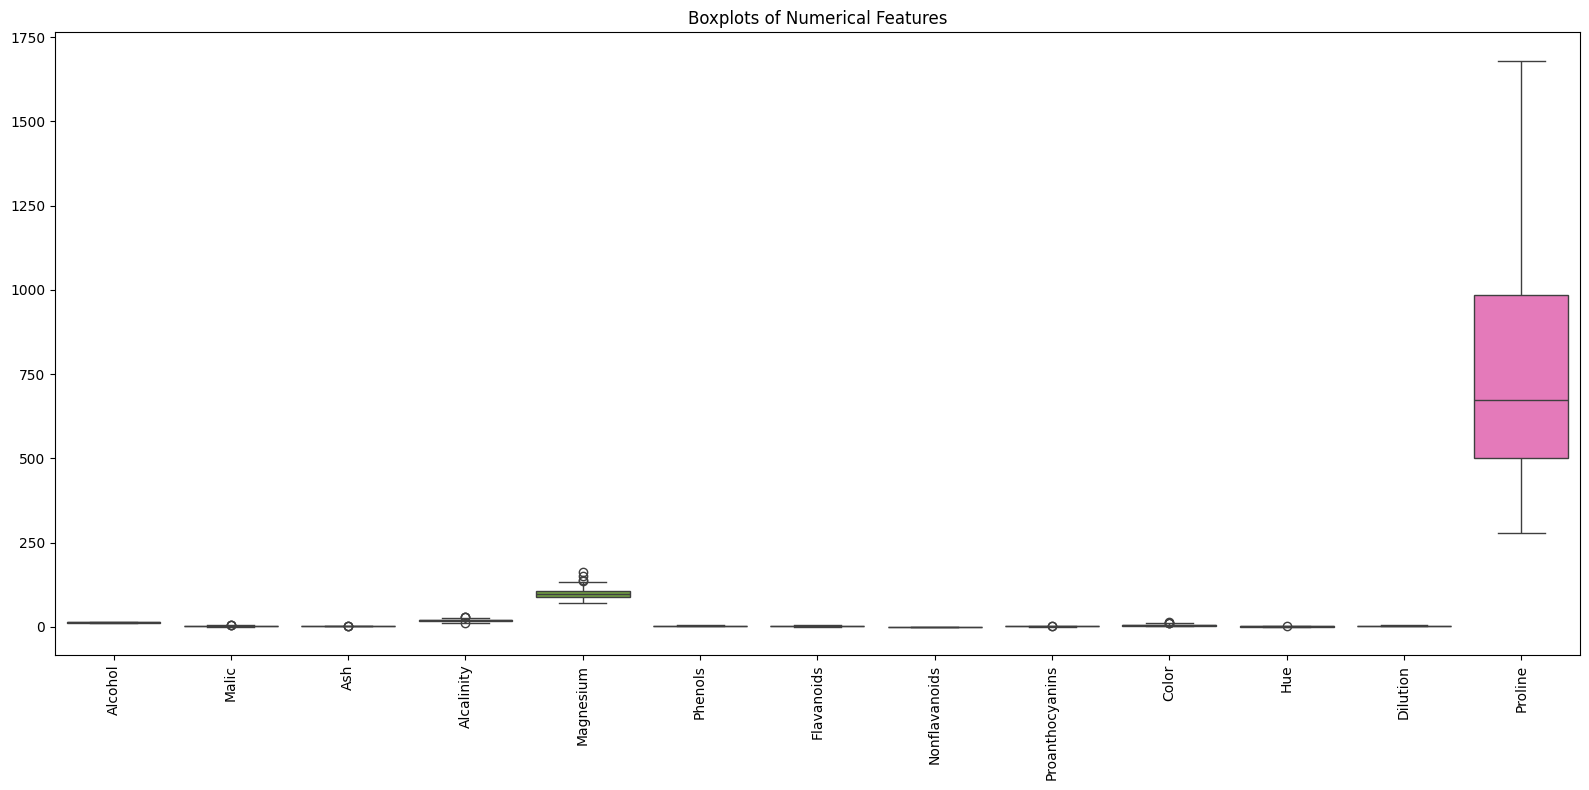

In [11]:
# Boxplots
plt.figure(figsize=(16, 8))
sns.boxplot(data = data.drop('Type', axis=1))
plt.xticks(rotation=90)
plt.title("Boxplots of Numerical Features")
plt.tight_layout()
plt.show()

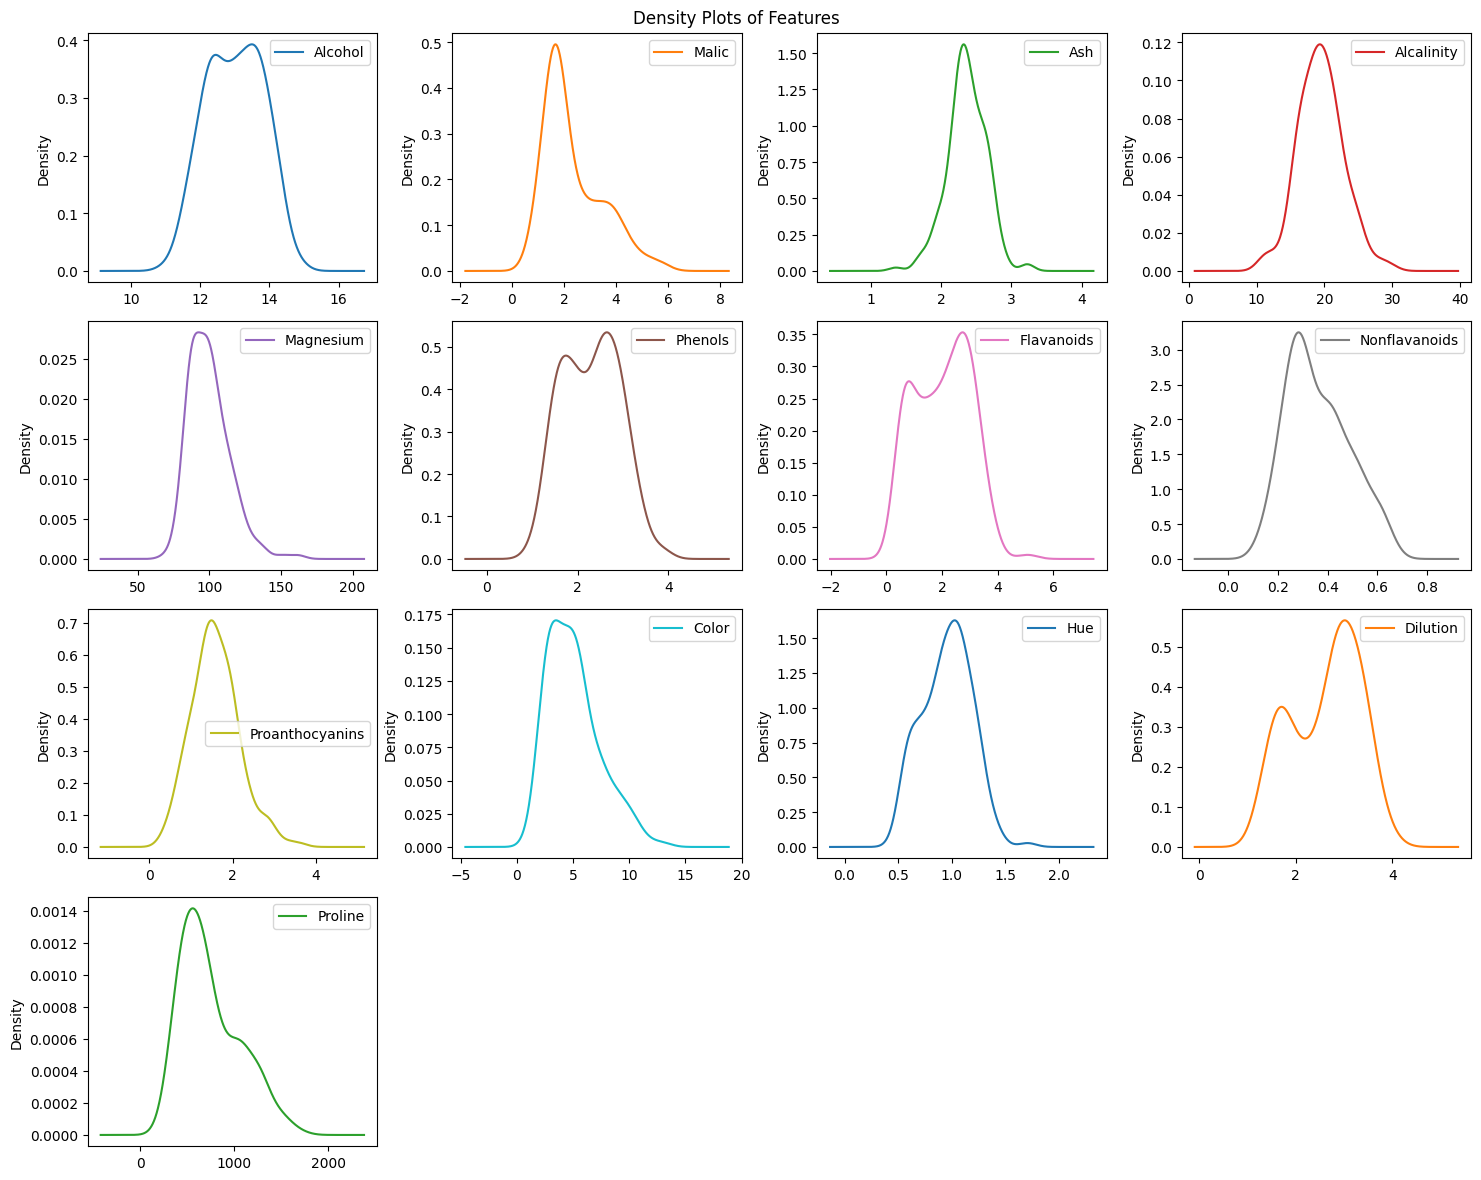

In [12]:
# Density Plots
data.drop("Type", axis=1).plot(kind='density', subplots=True, layout=(4, 4), figsize=(15, 12), sharex=False)
plt.suptitle("Density Plots of Features")
plt.tight_layout()
plt.show()

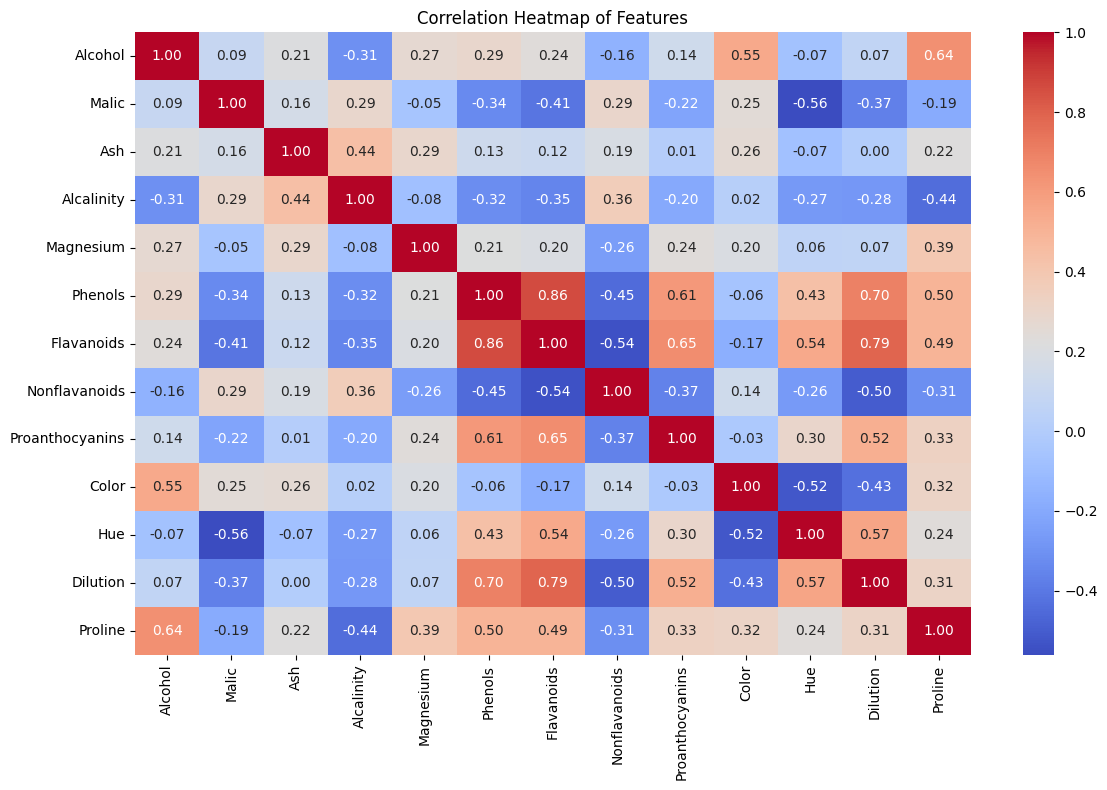

In [13]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop('Type', axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

In [15]:
# Standardize the features (excluding the target 'Type')
features = data.drop('Type', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [16]:
# Apply PCA
pca = PCA()
pca_components = pca.fit_transform(features_scaled)

In [17]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

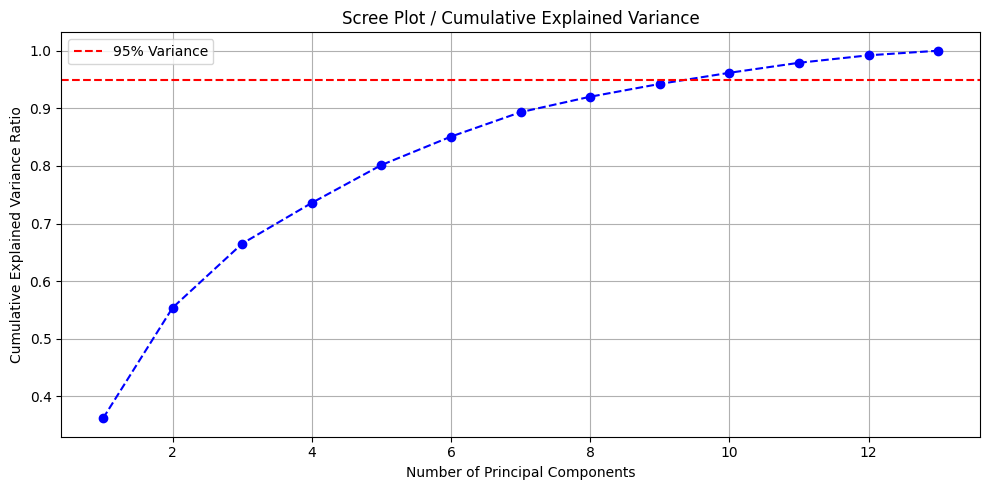

In [18]:
# Scree plot & cumulative variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title("Scree Plot / Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
# Find number of components that explain >= 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_95

np.int64(10)

In [22]:
# Transform data using optimal number of components
pca_final = PCA(n_components=n_components_95)
features_pca = pca_final.fit_transform(features_scaled)
explained_variance[:n_components_95]

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019])

In [25]:
# Use the standardized features from earlier
X = data.drop("Type", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

In [27]:
# Reduce to 2D for plotting
pca_vis = PCA(n_components=2)
X_pca_vis = pca_vis.fit_transform(X_scaled)

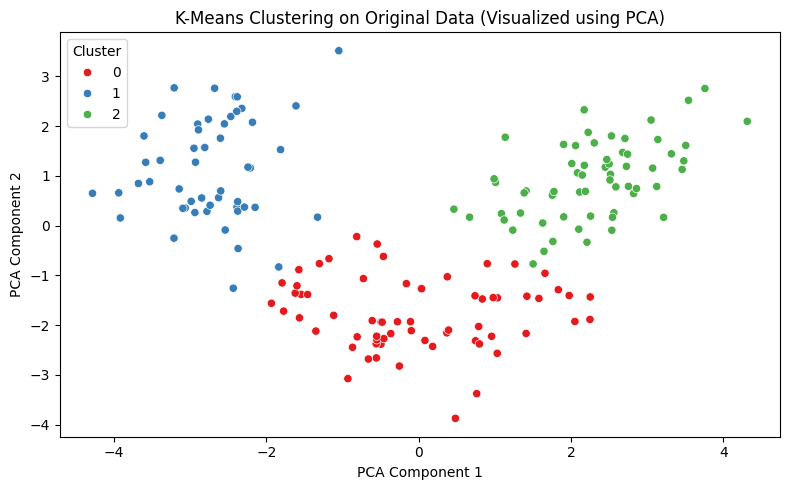

In [28]:
# Plot clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca_vis[:, 0], y=X_pca_vis[:, 1], hue=labels_kmeans, palette='Set1')
plt.title("K-Means Clustering on Original Data (Visualized using PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [30]:
# Silhouette Score
sil_score = silhouette_score(X_scaled, labels_kmeans)
sil_score

np.float64(0.2848589191898987)

In [31]:
# Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled, labels_kmeans)
db_score

np.float64(1.3891879777181648)

In [ ]:
#Clustering on PCA-transformed data performed slightly better in both metrics. Visual separation of clusters also improved.

In [ ]:
#Similarities:

# Both clustering approaches identified 3 clusters.

# Many data points belonged to the same cluster in both methods.

In [ ]:
# Differences:

# PCA-transformed clustering resulted in tighter, more distinct groups.

# Some points that were ambiguously clustered in the original space got better separated in PCA space.

In [ ]:
# PCA improved clustering performance by:

# Removing noise and redundant information.

# Creating uncorrelated features (principal components), which are better suited for distance-based algorithms like K-Means.

# Enhancing cluster visibility in low-dimensional space.

In [ ]:
# PCA reduced the feature space from 13 to ~10, explaining 95% of the variance, with no significant loss of information.

In [ ]:
# PCA sacrifices interpretability (we lose original feature names in PCs) but gains in performance and visualization clarity.

# For exploratory purposes and better clustering, PCA is highly recommended.

# For final decision-making or model explanations, original features may still be useful.



In [ ]:
# The Wine dataset was successfully explored, revealing no missing values and several skewed distributions and outliers.

# PCA reduced dimensionality from 13 to ~10 features while retaining 95% of the variance.

# K-Means clustering performed better on PCA-transformed data compared to the original dataset:

# Higher Silhouette Score and lower Davies–Bouldin Index.

# Better visual separation of clusters in 2D plots.

# Strong correlations between features like Flavanoids, Phenols, and Proline suggested potential redundancy — which PCA effectively addressed.

In [ ]:
# PCA helps simplify complex datasets, making clustering more efficient and accurate by:

# Removing noise and multicollinearity,

# Reducing the number of features,

# Enabling better cluster visualization in 2D or 3D

In [ ]:
# Combining PCA with clustering provides a powerful toolkit for uncovering structure in
# complex datasets. It enhances model performance, simplifies analysis, and improves
# visualization — making it a best practice in many unsupervised learning pipelines.

